<a href="https://colab.research.google.com/github/adib0073/DataViz_Workshop/blob/main/Data_Viz_Workshop_Day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization Tools and Libraries

### Part2: Exploratory Data Analysis in Data Science through Matplotlib, Seaborn, Pandas and NumPy in Python

We will cover the following topics in this session:
1. Loading Data and Data Inspection using Pandas
2. Data Distribution using Histograms
3. Univariate Analysis using Bar plots, Scatter Plots, Area Plots, Pie Charts,Point Plots
4. Bivariate analysis using Pairplots, Box plots, Violin Plots, Stacked plots
5. Missing Value Visualization
6. Correlation Visualization using Heatmaps
7. Customizing Matplotlib and Seaborn Visualization
8. Bonus section: Word Clouds, Sankey Plots, Radar plots


### About the dataset

Heart Disease Dataset- https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

The Heart Disease Dataset is used to solve the problem of classifying whether a patient will have heart disease or not, which is a Binary Classification problem. The data used for this assignment is obtained from Kaggle. This dataset is a processed version of the actual Cleveland database data obtained from UCI Datasets. This problem and the dataset are interesting because the dataset has multiple feature attributes (13 feature attributes) and each of these features are of different types (combination of continuous and categorical values) and the scale of the continuous values are completely different and it will be interesting to see how the Machine Learning algorithms perform on this. Also, the number of records is limited (around 303 records) and there are some outliers observed within the data. So, it will be really interesting to see how our Machine Learning Algorithms can be used to generalize on such a limited dataset with noise. And finally predicting heart disease can have real life use case and application, so that’s why I felt this would be a good problem to investigate.


### Data Description

1. `age` (Age of the patient in years)
2. `gender` (Male/Female)
3. `chest_pain_type` : chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
4. `resting_bp` : resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
5. `cholestoral` (serum cholesterol in mg/dl)
6. `fasting_blood_sugar` (if fasting blood sugar > 120 mg/dl)
7. `restecg` (resting electrocardiographic results) -> Values: [normal, stt abnormality, lv hypertrophy]
8. `max_hr`: maximum heart rate achieved
9. `exang`: exercise-induced angina (True/ False)
10. `oldpeak`: ST depression induced by exercise relative to rest
11. `slope`: the slope of the peak exercise ST segment
12. `num_major_vessels`: number of major vessels (0-3) colored by fluoroscopy
13. `thal`: [normal; fixed defect; reversible defect]
14. `num`: the predicted attribute

### Importing libraries in Python

In [1]:
# Importing the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data and Data inspection

In [2]:
# Downloading data and loading data as a data frame
data = pd.read_csv("https://raw.githubusercontent.com/adib0073/Educative_SSDS_course/main/data/heart_disease.csv")
data.head()

,age,gender,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking Missing Values

In [6]:
data.isnull().sum()

age                    0
gender                 0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

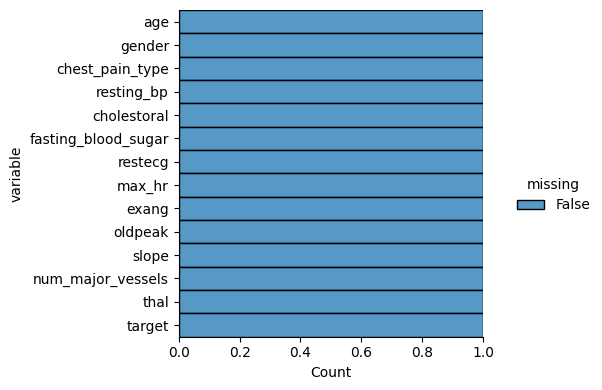

In [7]:
# Let's check missing values
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=4,
    aspect=1.3
)
plt.show()

### Predictor variable analysis

In [8]:
# Separating Categorical and Continuous Numerical Variables
categorical = ['gender','chest_pain_type', 'fasting_blood_sugar', 'num_major_vessels', 'restecg', 'exang', 'slope', 'thal']
continuous = ['age', 'resting_bp', 'cholestoral', 'max_hr', 'oldpeak']

In [9]:
# Descriptive Statistics for Numerical Variables

data[continuous].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
resting_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_hr,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
# Frequency for Categorical Variables
for variable in categorical:
  print(data[variable].value_counts())

1    207
0     96
Name: gender, dtype: int64
0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64
0    258
1     45
Name: fasting_blood_sugar, dtype: int64
0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64
1    152
0    147
2      4
Name: restecg, dtype: int64
0    204
1     99
Name: exang, dtype: int64
2    142
1    140
0     21
Name: slope, dtype: int64
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


### Data Distribution Check using Histogram

Data Distribution


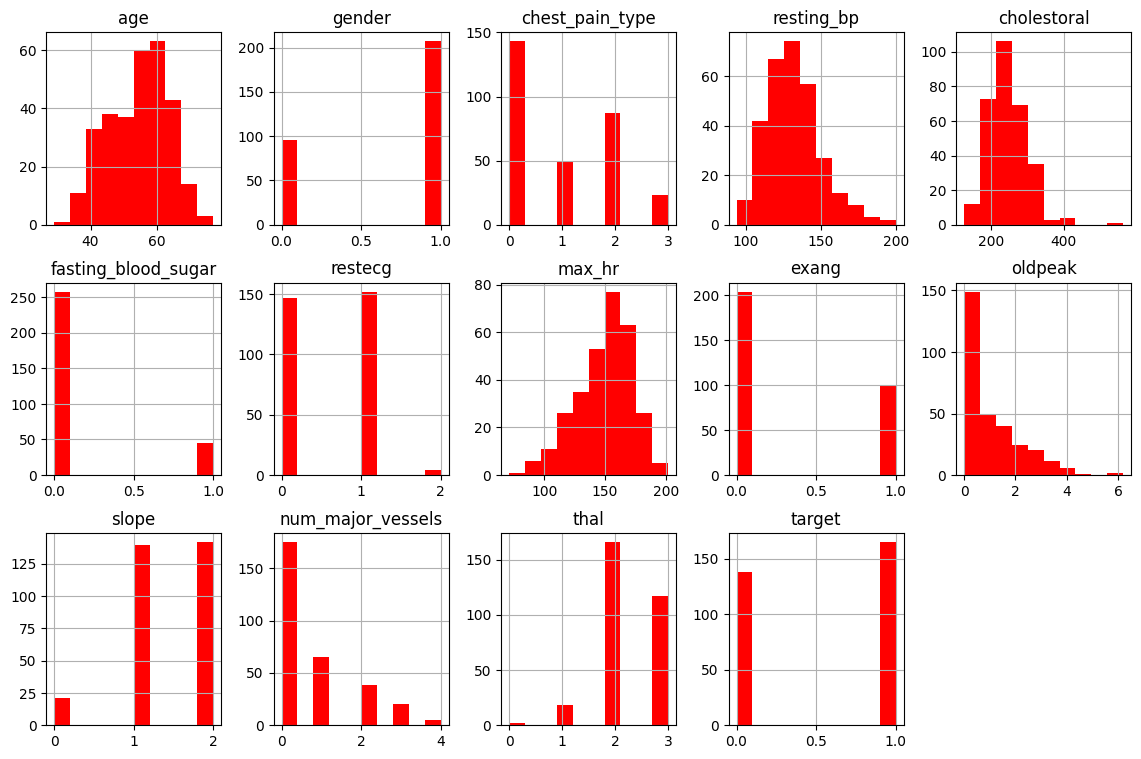

In [11]:
data.hist(layout = (3,5), figsize=(14,9), color = 'r')
print('Data Distribution')

### Univariate Analysis

##### **Checking Frequency of Categorical Variables using Bar Plots**

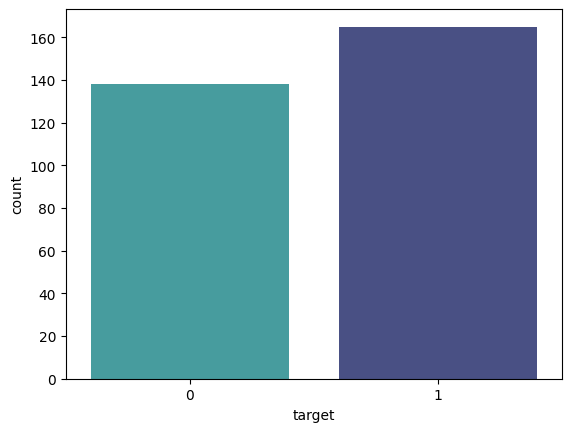

This looks like a fairly balanced dataset, as distribution of majority and minority class is around 55:45


In [12]:
sns.countplot(x="target", data=data, palette="mako_r")
plt.show()
print('This looks like a fairly balanced dataset, as distribution of majority and minority class is around 55:45')

#### **Using Pie charts instead of bar plots**

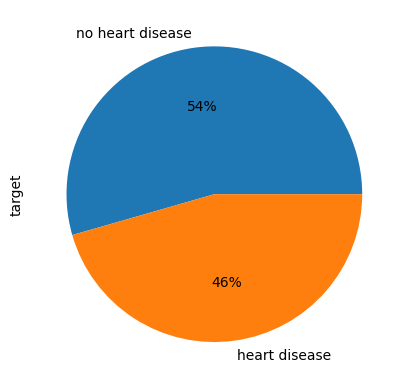

In [13]:
data.target.value_counts().plot(kind='pie', labels=['no heart disease', 'heart disease'], autopct='%1.0f%%')
plt.show()

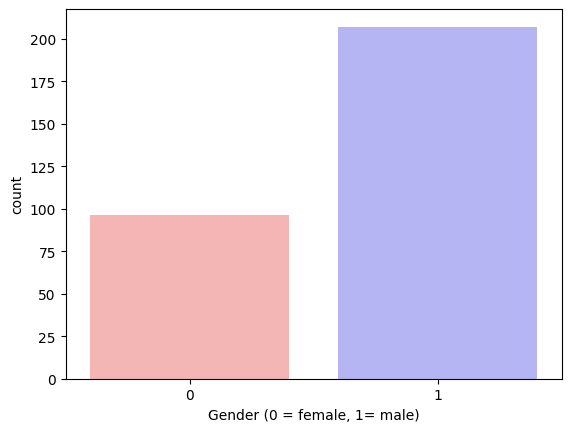

In [14]:
sns.countplot(x='gender', data=data, palette="bwr_r")
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

##### **Data Density using Area Plot**


<Axes: xlabel='cholestoral', ylabel='Density'>

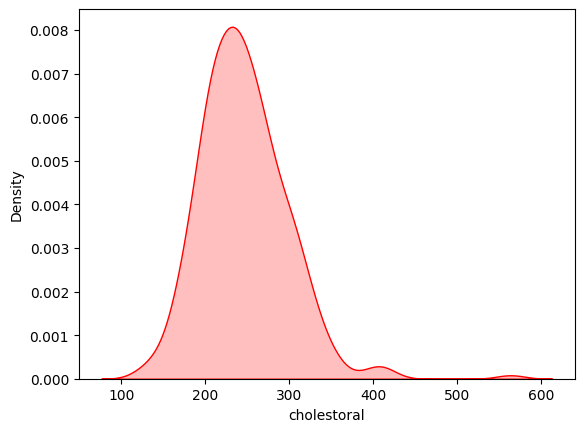

In [15]:
sns.kdeplot(x='cholestoral',
            data=data,
            fill = True ,
            color = "Red")

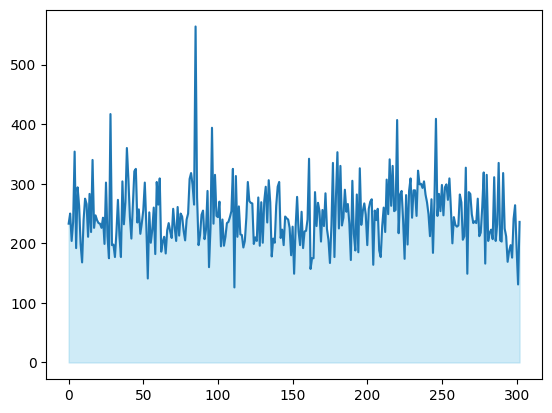

In [16]:
# Custom area plots
# Plotting a line plot first
plt.plot(range(len(data)),data["cholestoral"])
# Using fill_between to highlight the area covered under the plot
plt.fill_between(range(len(data)),data["cholestoral"], color="skyblue", alpha=0.4)
plt.show()

#### Bivariate Analysis

Analysing distribution of target and gender (0-female 1-male)


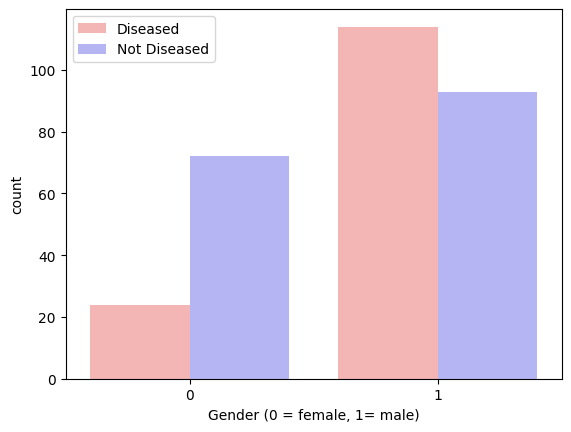

In [17]:
print('Analysing distribution of target and gender (0-female 1-male)')
sns.countplot(x = data['gender'], hue = data['target'], palette='bwr_r')
plt.legend(["Diseased", "Not Diseased"])
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

##### **Scatter Plots**

<Axes: xlabel='target', ylabel='cholestoral'>

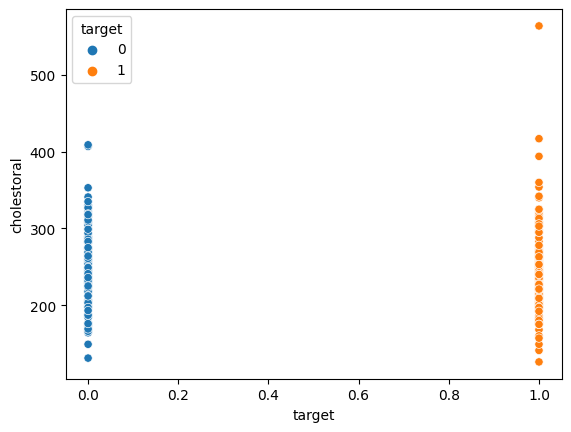

In [18]:
# Scatter Plots
sns.scatterplot(x="target",
                y="cholestoral",
                data=data,
                hue='target')

##### **Linked Bar Plots**

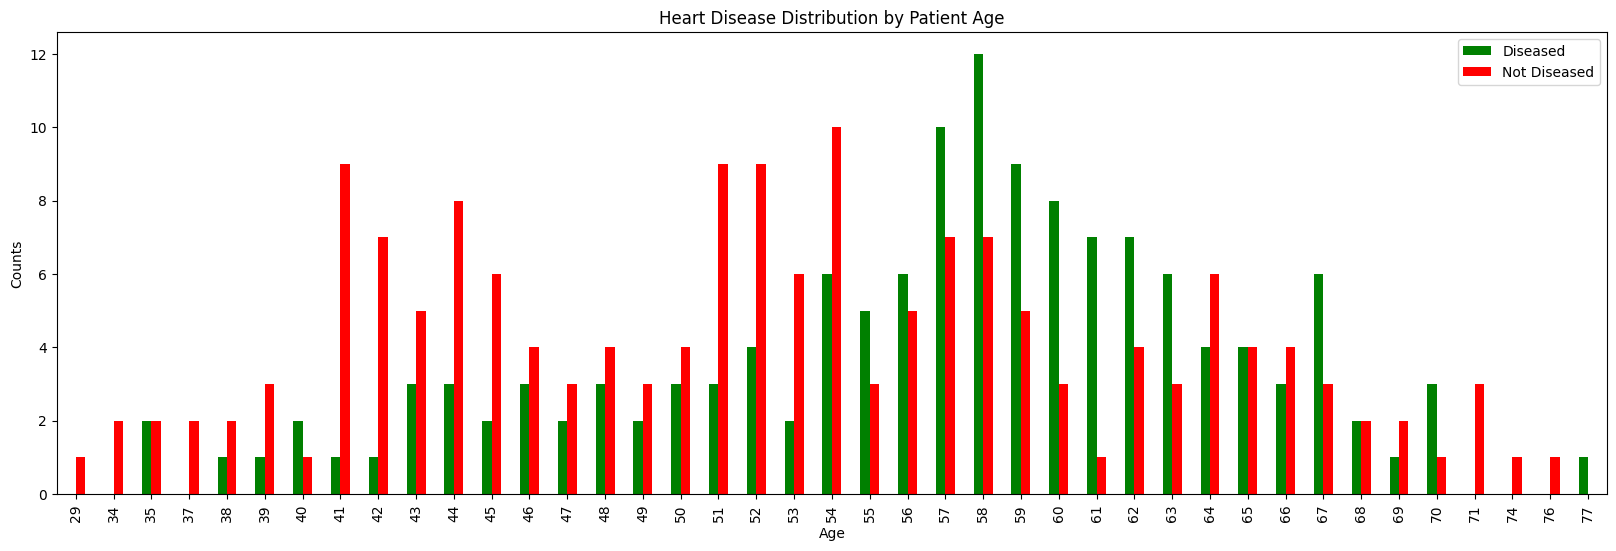

In [19]:
# Linked Bar Plot
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6), color = ['g','r'])
plt.title('Heart Disease Distribution by Patient Age')
plt.legend(["Diseased", "Not Diseased"])
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

##### **Stacked Bar Plots**

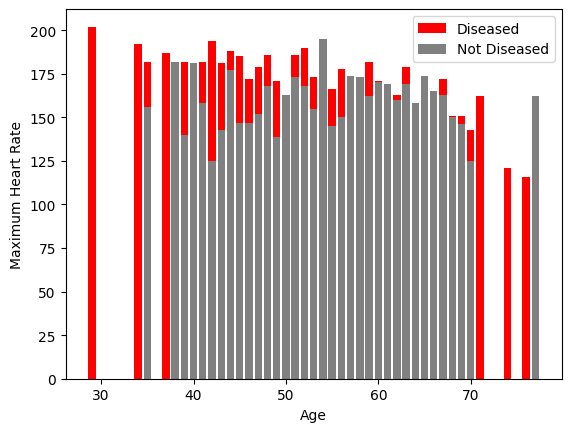

In [20]:
plt.bar(data.age[data.target==1], data.max_hr[(data.target==1)], color="red")
plt.bar(data.age[data.target==0], data.max_hr[(data.target==0)], color="grey")
plt.legend(["Diseased", "Not Diseased"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

#### **Point plots**

<Axes: xlabel='target', ylabel='max_hr'>

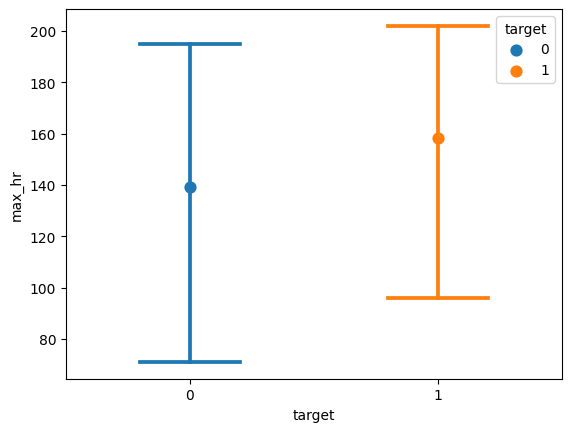

In [21]:
sns.pointplot(
    data=data, x="target", y="max_hr",
    hue="target",
    errorbar=("pi", 100), capsize=.4, join=False,
)

#### **Pair plot**

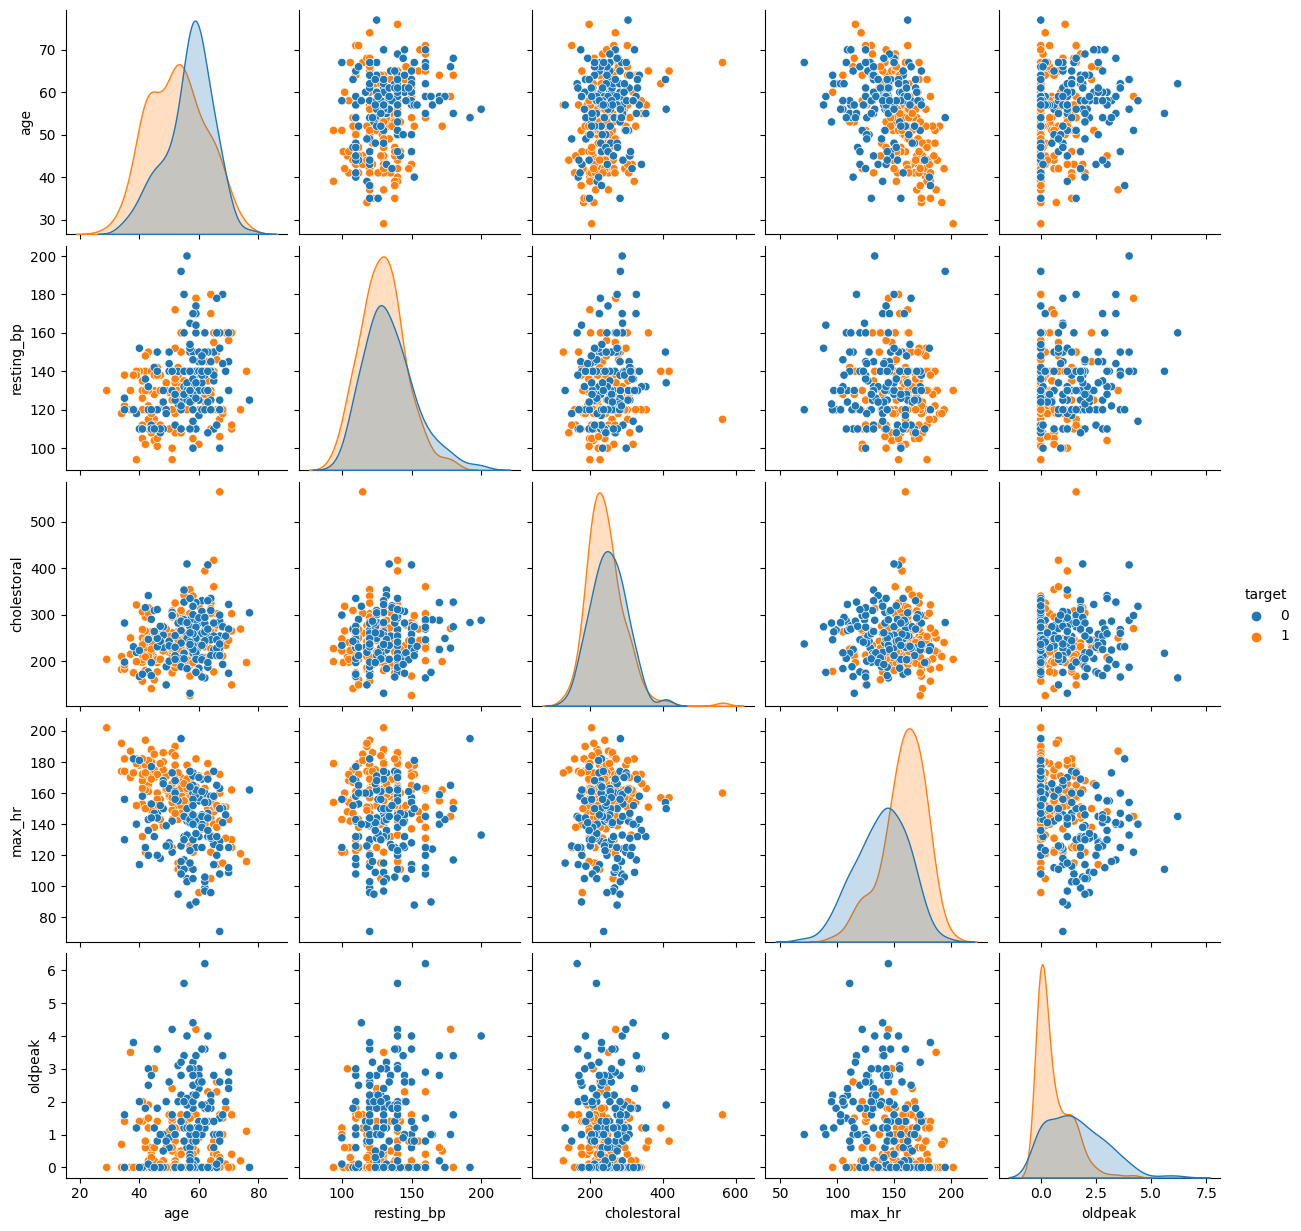

In [22]:
# Pair plots in Python
sns.pairplot(data=data[continuous + ['target']], hue='target')

### Duplicate data inspection

In [23]:
data.duplicated().any()

True

In [24]:
data.drop_duplicates(subset=None, inplace=True)
data.duplicated().any()

False

In [25]:
data.shape

(302, 14)

### Outlier Detection

In [26]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [27]:
outliers = []
# Outlier detection for continuous variables
for col in continuous:
    print(f"{col} :  {check_outlier(data, col)}")
    outliers.append(check_outlier(data, col))

print(f"Outliers detected? {np.array(outliers).any()}")

age :  False
resting_bp :  False
cholestoral :  True
max_hr :  False
oldpeak :  False
Outliers detected? True


##### **Box Plots**

<Axes: xlabel='target', ylabel='cholestoral'>

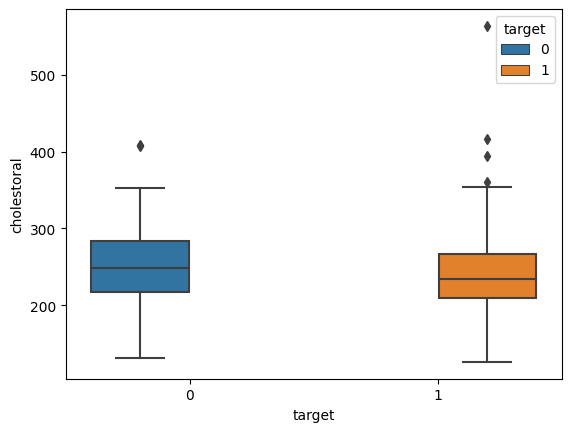

In [28]:
# Box Plots
sns.boxplot(x="target",
            y="cholestoral",
            data=data,
            hue='target')

##### **Violin Plots**

<Axes: xlabel='target', ylabel='cholestoral'>

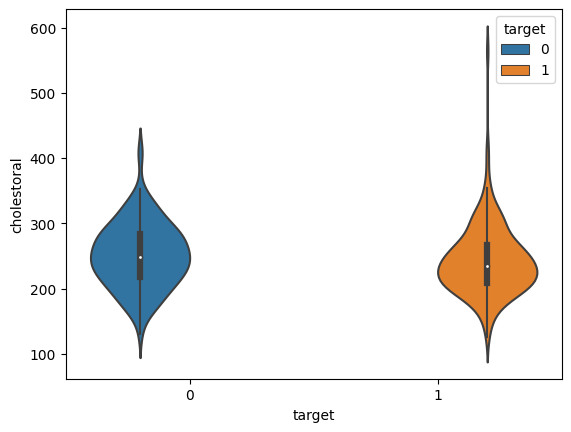

In [29]:
# Violin Plots
sns.violinplot(x="target",
               y="cholestoral",
               data=data,
               hue='target')

### Data Correlation Check

In [30]:
data.corr()

,age,gender,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
gender,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
chest_pain_type,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
resting_bp,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
cholestoral,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fasting_blood_sugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
max_hr,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


##### **Heatmap Plots**

<Axes: >

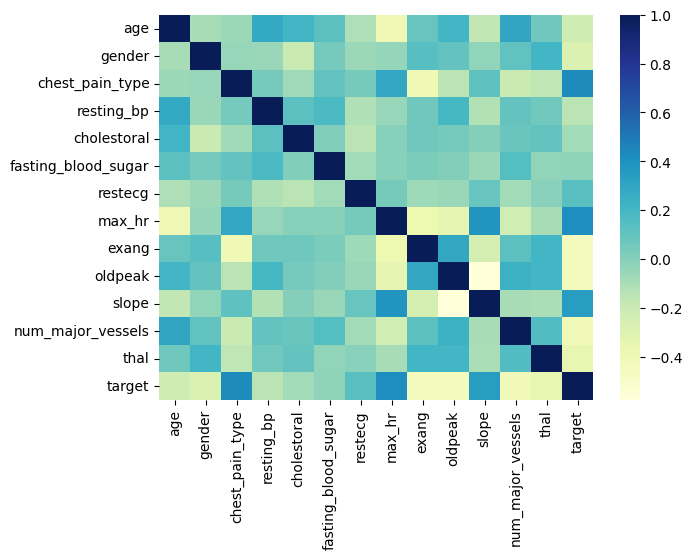

In [31]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),
            cmap="YlGnBu")

age                   -0.221476
gender                -0.283609
chest_pain_type        0.432080
resting_bp            -0.146269
cholestoral           -0.081437
fasting_blood_sugar   -0.026826
restecg                0.134874
max_hr                 0.419955
exang                 -0.435601
oldpeak               -0.429146
slope                  0.343940
num_major_vessels     -0.408992
thal                  -0.343101
target                 1.000000
Name: target, dtype: float64


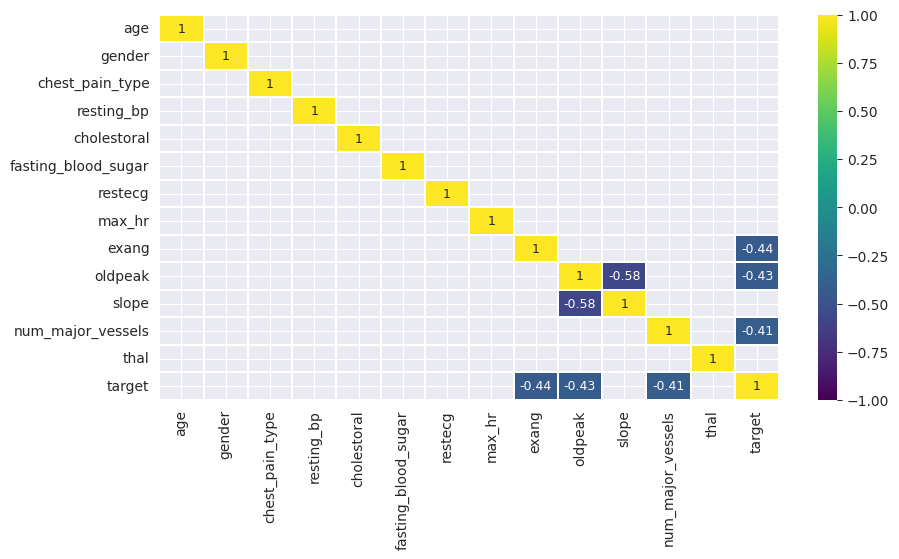

In [32]:
sns.set_style(style="darkgrid")
print(data.corr()['target'])
corr = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 9});
plt.show()

### Customizing Matplotlib and Seaborn Visualization

Till now, we have seen different types of plots we can use in `matplotlib.pyplot`. However, we may also need to customize our plots based on our needs and requirements.

### Markers
Markers in matplotlib is used to emphasize the data points using the specified symbol of specified size and color. The following keywords are used to customize the corresponding elements of the plots:

`marker` : marker type

`ms` : size

`mec` : edge color

`mfc` : face color

Let's see a code example for customizing the marker in matplotlib.

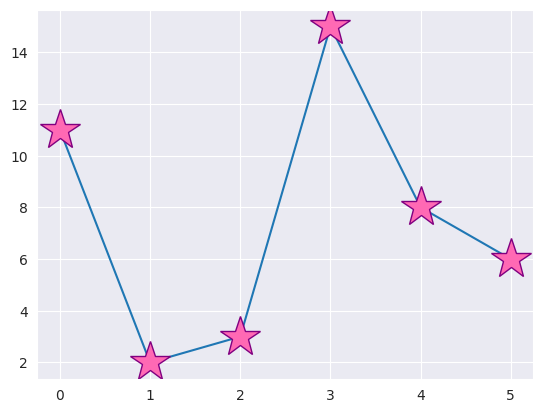

In [33]:
data_val = np.array([11, 2, 3, 15, 8, 6])
plt.plot(data_val, marker = '*', ms = 30, mec = 'purple', mfc = 'hotpink')
plt.show()

### Line style

Along with the marker, we can also customize the line style in line plots using Matplotlib. The keyword `linestyle` or `l`s (it's short form) is used to customize the line style. We can use `linewidth` and `color` to customize the width and color of the line respectively.

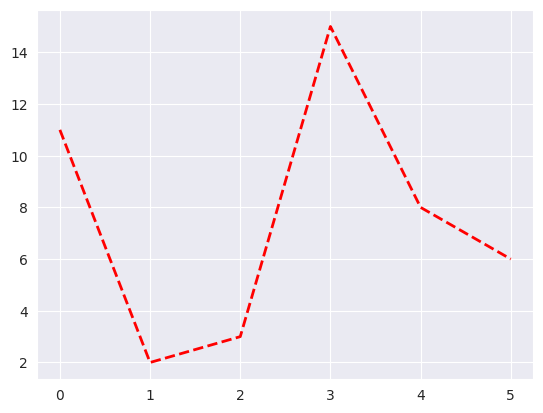

In [34]:
data_val = np.array([11, 2, 3, 15, 8, 6])
plt.plot(data_val, ls='--', linewidth =2, color='red')
plt.show()

### Labels
As shown in the following code demonstration, we can use `xlabel()`, `ylabel()` and `title()` from `pyplot` to add x and y axes labels and the plot title, respectively.

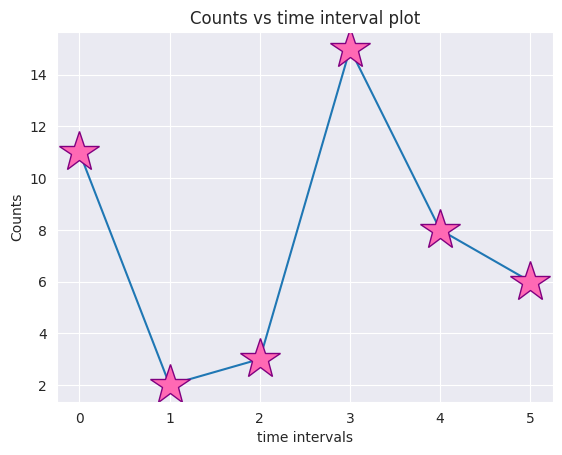

In [35]:
data_val = np.array([11, 2, 3, 15, 8, 6])
plt.plot(data_val, marker = '*', ms = 30, mec = 'purple', mfc = 'hotpink')
plt.xlabel('time intervals')
plt.ylabel('Counts')
plt.title("Counts vs time interval plot")
plt.show()

### Grids
As shown in the following code demonstration, we can use `grid()` from `pyplot` to display gridlines in the plot. We can also specify the axes of the gridline if needed using the axis parameter.

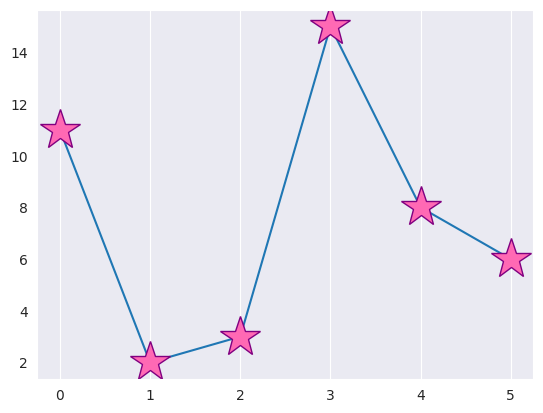

In [36]:
data_val = np.array([11, 2, 3, 15, 8, 6])
plt.plot(data_val, marker = '*', ms = 30, mec = 'purple', mfc = 'hotpink')
plt.grid(axis = 'y') #or plt.grid() for both x and y axes
plt.show()

### Sub-plots
The `subplot` method in `pyplot` allows us to use multiple subplots. We can specify the number of rows, columns, and plot numbers in the `subplot()` as shown in the following code.

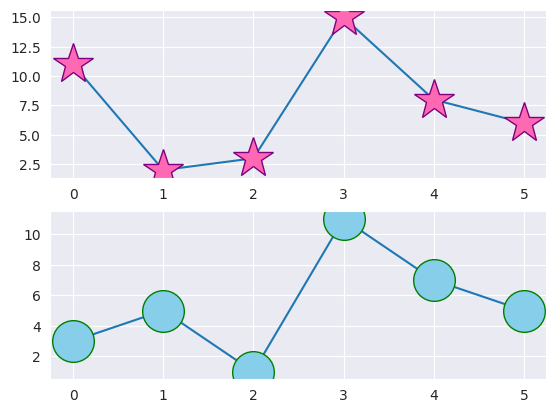

In [37]:
#plot 1
plt.subplot(2, 1, 1) #parameters: number of rows, columns and plots in one row
data1 = np.array([11, 2, 3, 15, 8, 6])
plt.plot(data1, marker = '*', ms = 30, mec = 'purple', mfc = 'hotpink')

#plot 2
plt.subplot(2, 1, 2)
data2 = np.array([3, 5, 1, 11, 7, 5])
plt.plot(data2, marker = 'o', ms = 30, mec = 'green', mfc = 'skyblue')
plt.show()

Take a look at this document for other customization options in Matplotlib: https://matplotlib.org/stable/users/explain/customizing.html

### Customisation for the Seaborn Library

**Plot themes**

Seaborn provides `set_theme()` to set the plot themes. The default style is `'white'` when `set_theme()` is not used. When `set_theme()` is used, the style changes to `'dark_grid'` instead. Only the plot style can be altered using the `set_style()` method. I recommend you take a look at the Seaborn documentation to find out more about the different themes available in Seaborn.

<Axes: xlabel='gender', ylabel='count'>

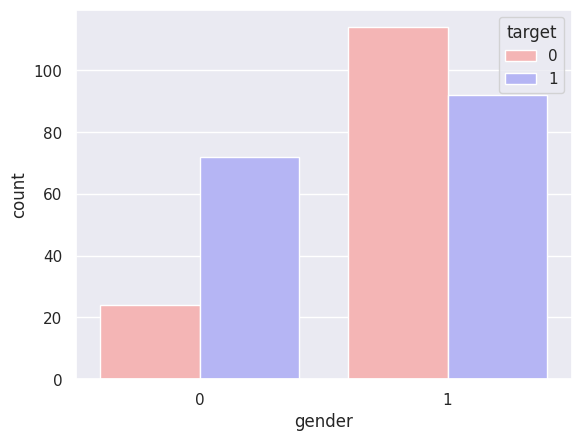

In [42]:
# dark grid theme
sns.set_theme()
sns.countplot(x = data['gender'], hue = data['target'], palette='bwr_r')


<Axes: xlabel='gender', ylabel='count'>

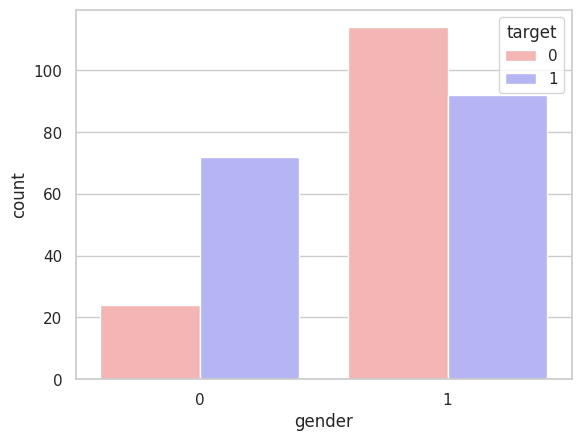

In [43]:
# white-grid pastel theme
sns.set_theme(style='whitegrid', palette="pastel")
sns.countplot(x = data['gender'], hue = data['target'], palette='bwr_r')

### Color palettes
Seaborn also offers different color palettes to customize the plot visualizations. The `color_palette()` allows us to select a color palette of our choice in Seaborn. Color Palettes are usually categorized as `Diverging`, `Sequential`, and `Qualitative`.

Take a look at this document for more color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html

Let us see some code examples for some of the different color palettes in Seaborn.

<Axes: xlabel='gender', ylabel='count'>

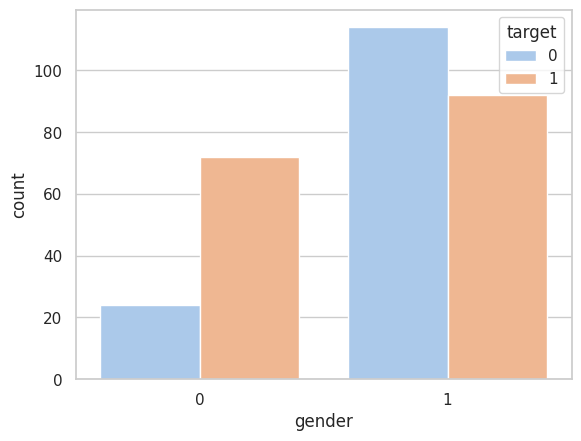

In [45]:
# Quantitative
sns.set_theme(style='whitegrid', palette=sns.color_palette())
sns.countplot(x = data['gender'], hue = data['target'])

<Axes: xlabel='gender', ylabel='count'>

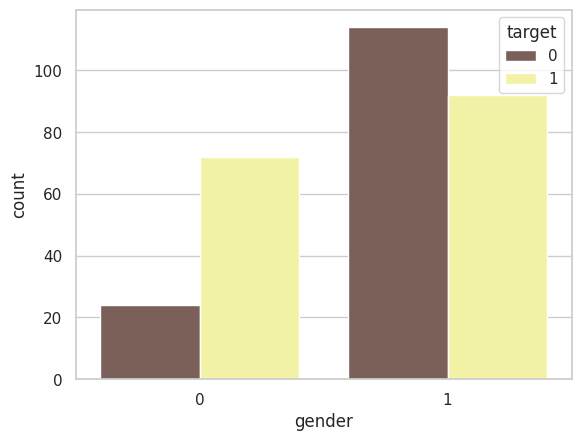

In [46]:
# Diverging
sns.set_theme(style='whitegrid', palette=sns.color_palette('terrain_r', 3))
sns.countplot(x = data['gender'], hue = data['target'])

<Axes: xlabel='gender', ylabel='count'>

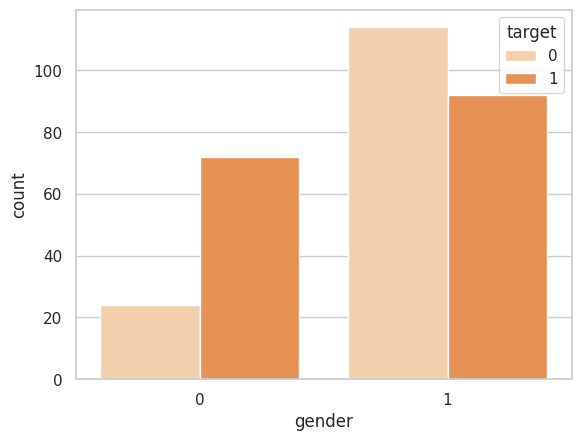

In [47]:
# Sequential
sns.set_theme(style='whitegrid', palette=sns.color_palette('Oranges', 3))
sns.countplot(x = data['gender'], hue = data['target'])

### Bonus section: Word Clouds, Sankey Plots, Radar plots

### Word Clouds

(-0.5, 399.5, 199.5, -0.5)

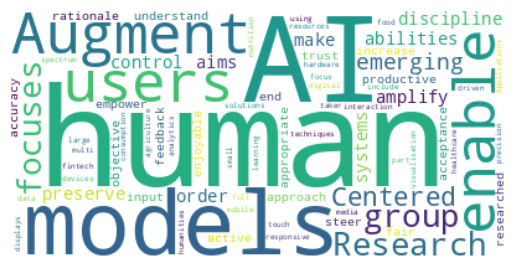

In [50]:
from wordcloud import WordCloud

text = "Research in the Augment group focuses on Human-Centered AI, an emerging discipline that aims to amplify and augment human abilities and preserve human control in order to make AI systems more productive, enjoyable, and fair. The objective is to enable end-users to understand the rationale of AI models and to enable them to steer models with input and feedback.  The approach is researched to increase appropriate trust, acceptance and accuracy of models and to empower users to be an active and responsive part-taker in data-driven solutions. The focus is on visualisation and interaction techniques, using the full spectrum of hardware from small mobile devices to large multi-touch displays. Applications include learning analytics, precision agriculture, healthcare, media consumption, digital humanities, food & nutrition, fintech and human resources."

# Generate a word cloud image
wordcloud = WordCloud(background_color="white",).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Sankey Plots using Plotly (discussed more in the next session)

In [55]:
import plotly.graph_objects as go
import urllib, json

In [56]:
url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

In [57]:
fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)

### Radar Plots in Python

In [ ]:
from math import pi
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

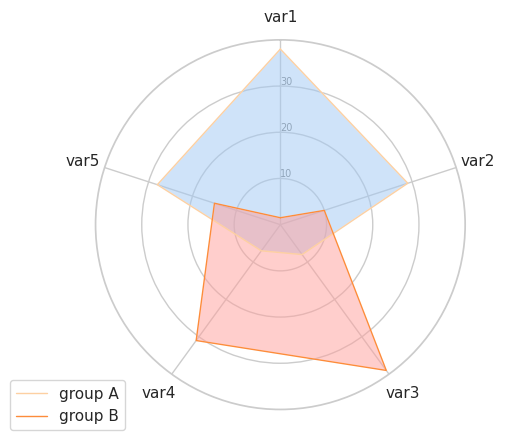

In [61]:
# ------- PART 1: Create background

# number of variable
categories=list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

# ------- PART 2: Add plots

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.5)

# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.5)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()


Explore the Python Graph Gallery for more visualizations in Python: https://python-graph-gallery.com/